In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x, s=1.0, t=0.0):
    return 1./(1.+np.exp(-s*(x-t)))

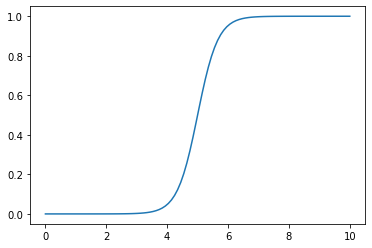

In [3]:
x = np.linspace(0,10,100)
plt.plot(x, sigmoid(x, s=3, t=5))

Text(0, 0.5, 'Height ($y$)')

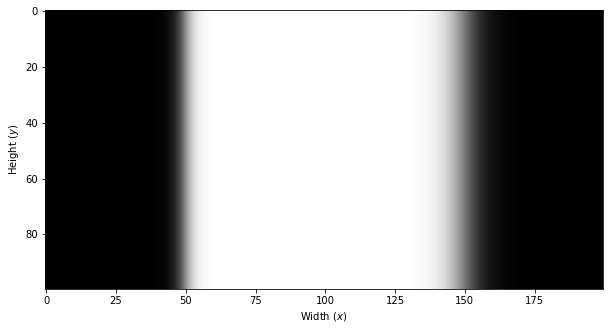

In [4]:
# The following does exactly what the for-loop shown above does
import numpy.matlib as matlab
im = matlab.repmat(np.hstack([sigmoid(x, s=5, t=5), 1-sigmoid(x, s=2.5, t=5)]), 100,1)    
    
plt.figure(figsize=(10,7))
plt.imshow(im, cmap='gray')
plt.xlabel('Width ($x$)')
plt.ylabel('Height ($y$)')

Text(0, 0.5, '$I(x)$')

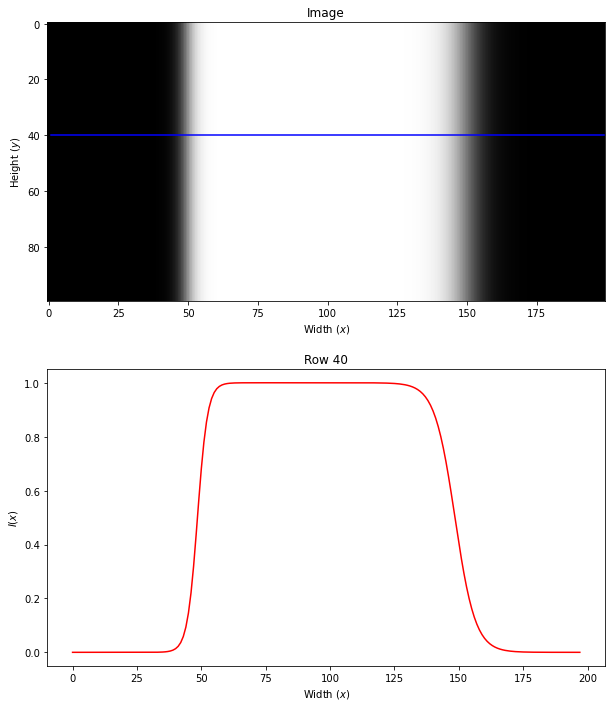

In [12]:
plt.figure(figsize=(10,12))

plt.subplot(211)
plt.imshow(im, cmap='gray')

plt.title('Image')
plt.plot([1,199],[40,40],'b-')#from point 1-199 on the x-axis and point 40 on the y-axis draw a blue line
plt.xlabel(r'Width ($x$)')
plt.ylabel(r'Height ($y$)')

plt.subplot(212)
plt.title('Row 40')
plt.plot(im[40,1:199],'r'# on all 40 row draw a continuous line from 1 to 199
plt.xlabel(r'Width ($x$)')
plt.ylabel(r'$I(x)$')

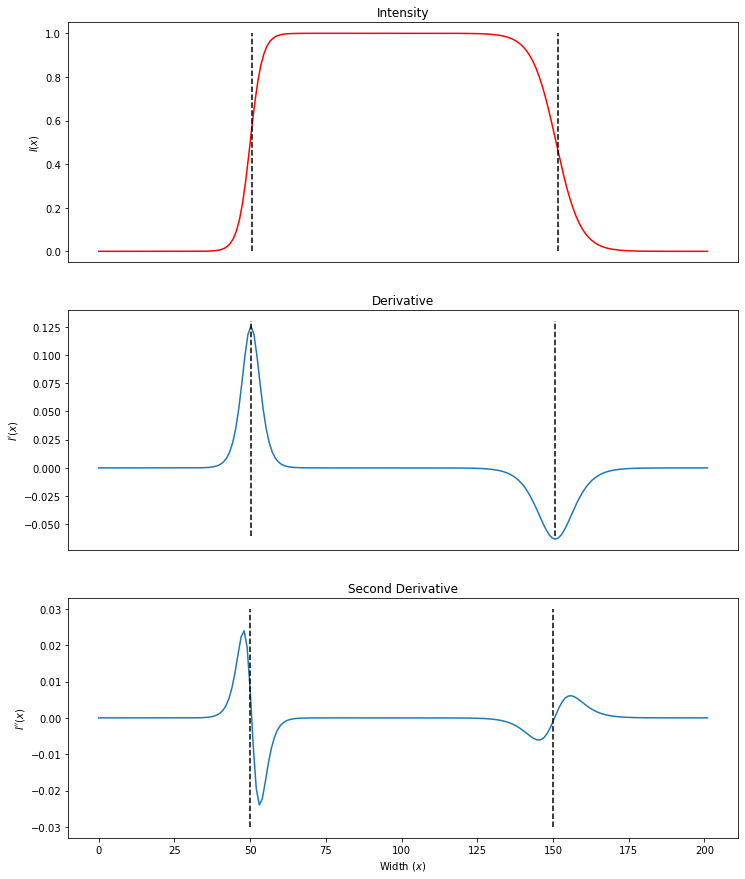

In [14]:
Hx = [1,-1]
dx = np.convolve(im[0,:], Hx)
d2x = np.convolve(dx, Hx)

plt.figure(figsize=(12,15))

plt.subplot(311)
plt.title('Intensity')
plt.ylabel(r'$I(x)$')
plt.plot(im[0,:],'r') #'[0,:]' on the first array of im draw all in red
plt.xticks([])#
plt.plot([150,150],[0,1],'k--')#draws a vertical dashed line on point 150 on the x-axis and from points 0 to 1 on the y-axis
plt.plot([50,50],[0,1],'k--')#draws a vertical dashed line on point 50 on the x-axis and from points 0 to 1 on the y-axis


plt.subplot(312)
plt.ylabel(r"$I'(x)$")
plt.title('Derivative')
plt.plot(dx)
plt.xticks([])
plt.plot([50,50],[-0.06,0.13],'k--')#draws a vertical dashed line on point 50 on the x-axis and from points -0.06 to 0.13 on the y-axis
plt.plot([150,150],[-0.06,0.13],'k--')#draws a vertical dashed line on point 150 on the x-axis and from points -0.06 to 0.13 on the y-axis

plt.subplot(313)
plt.title('Second Derivative')
plt.xlabel(r'Width ($x$)')
plt.ylabel(r"$I''(x)$")
plt.plot(d2x)
plt.plot([50,50],[-0.03,0.03],'k--')#draws a vertical dashed line on point 50 on the x-axis and from points -0.03 to 0.03 on the y-axis
plt.plot([150,150],[-0.03,0.03],'k--')#draws a vertical dashed line on point 150 on the x-axis and from points -0.03 to 0.03 on the y-axis


In [15]:
import cv2
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# flipped since convolution is flips

Hx = np.array([[1,-1]], dtype='float32')
Hy = np.array([[1],[-1]], dtype='float32')

([], <a list of 0 Text major ticklabel objects>)

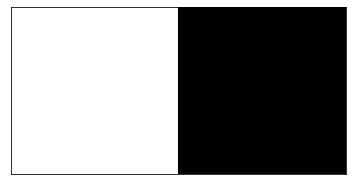

In [19]:
plt.imshow(Hx, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

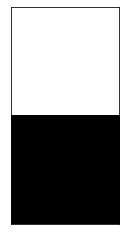

In [20]:
plt.imshow(Hy, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

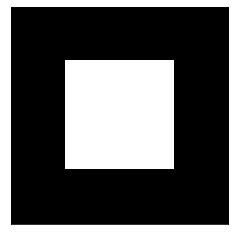

In [21]:
square = np.zeros((32,32), dtype='float32')
square[8:8+16, 8:8+16] = 1.0

plt.imshow(square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

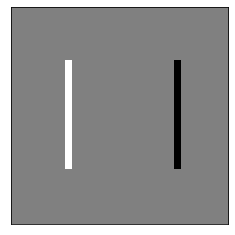

In [22]:
Hx_square = sp.signal.convolve2d(square, Hx, 'same')

plt.imshow(Hx_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

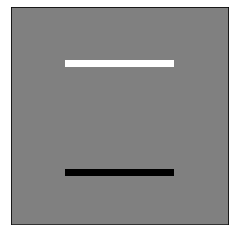

In [24]:
Hy_square = sp.signal.convolve2d(square, Hy, 'same')

plt.imshow(Hy_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

### Gradient Magnitude

Text(0.5, 1.0, 'Y derivative')

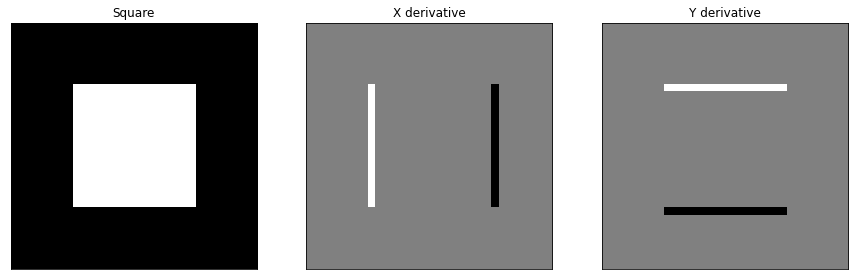

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Square')

plt.subplot(132)
plt.imshow(Hx_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('X derivative')

plt.subplot(133)
plt.imshow(Hy_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Y derivative')

Text(0.5, 1.0, 'Gradient magnitude')

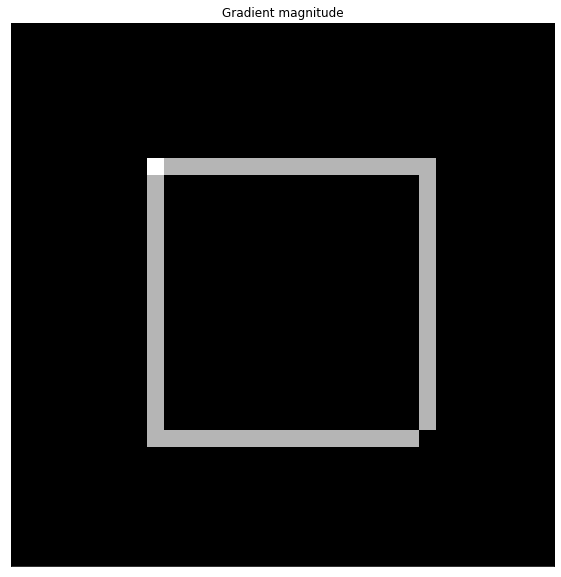

In [32]:
square_grad_mag = np.sqrt(np.square(Hx_square) + np.square(Hy_square))
plt.figure(figsize=(10,10))
plt.imshow(square_grad_mag, cmap='gray', interpolation='none')

plt.xticks([])
plt.yticks([])
plt.title('Gradient magnitude')

([], <a list of 0 Text major ticklabel objects>)

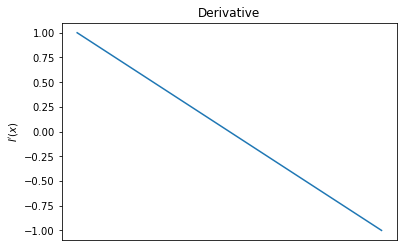

In [33]:
h = [1,0,-1]
I = [1, 2, 3, 3, 5, 4, 5, 10]
dx = np.convolve(1, h)
plt.ylabel(r"$I'(x)$")
plt.title('Derivative')
plt.plot(dx)
plt.xticks([])

In [34]:
import cv2
import numpy as np

img_bgr = np.array([2,34,129,65,100,24,32,134])

canny = cv2.Canny(img_bgr, threshold1=64, threshold2=128, apertureSize=3, L2gradient=True)
plt.imshow(canny)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-vo4apon2/opencv/modules/imgproc/src/canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'
